In [62]:
import matplotlib.pyplot as plt
import numpy as np


In [63]:
def read_waveforms(LA, RV, RA) :
    infile = open('waveforms.csv', 'r')

    line = infile.readline()
    wf = 0 # which waveform are we trying to read (0 = LA, 1 = RV, 2 = RA)

    while line :
        line = line.strip()
        data = line.split(',')

        for i in range(0, len(data)) : 
            data[i] = float(data[i])

        if(wf == 0) :
            LA.append(data)
        elif(wf == 1) :
            RV.append(data)
        elif(wf == 2) :
            RA.append(data)
        
        wf = (wf + 1) % 3
        line = infile.readline()

    infile.close()

In [64]:
def read_times(TL, TR) :
    infile = open('times.csv', 'r')
    line = infile.readline()
    data = line.strip().split(',')

    for i in range(0, len(data)) : 
        data[i] = float(data[i])*1000;

    TL.append(data)

    line = infile.readline()
    data = line.strip().split(',')

    for i in range(0, len(data)) : 
        data[i] = float(data[i])*1000;

    TR.append(data)
    infile.close()

In [65]:
# make empty data and time Lists
LA_list = []
RV_list = []
RA_list = []
TL_list = []
TR_list = []

In [66]:
read_waveforms(LA_list, RV_list, RA_list)

In [67]:
read_times(TL_list, TR_list)


In [68]:
# convert all data and time lists to numpy arrays for plotting
LA = np.array(LA_list)
RV = np.array(RV_list)
RA = np.array(RA_list)
TL = np.array(TL_list[0])
TR = np.array(TR_list[0])

In [69]:
print(np.mean( LA[2,:] ))

8.169597987500001


In [70]:
plt.plot(TL, LA[6, :])
plt.title('Linear Acceleration of Instance 7')
plt.xlabel('Time (ms)')
plt.ylabel('Lin Accel (g)')
plt.xticks(np.arange(0, 55, step=5))
plt.savefig('Instance 7.png')
plt.close()


In [71]:
def plot_waveforms(LA, RV, RA, TL, TR, sharex=True) :
    num_instances = len(LA)
    for i in range(0, num_instances) :
        plt.rcParams['figure.figsize'] = [6, 5.8]

        plt.subplot(3,1,1)
        ymaxLA = (( np.max(LA[0,:])))
        plt.plot(TL, LA[i])
        plt.title('Waveforms for Instance ' + str(i + 1))
        plt.ylabel('Lin Accel (g)')
        plt.xticks(np.arange(0, 55, step=5))
        #plt.yticks(np.arange(0, ymaxLA[i], step = 5 ))
        plt.tight_layout()

        plt.subplot(3,1,2)
        ymaxRV = (( np.max(RV[0,:]))) 
        plt.plot(TR, RV[i])
        plt.ylabel('Rot Vel (rad/sec)')
        plt.xticks(np.arange(0, 55, step=5))
        #plt.yticks(np.arange(0, ymaxRV[i], step = 5))
        plt.tight_layout()

        plt.subplot(3,1,3)
        ymaxRA = (( np.max(RA[0,:])))
        plt.plot(TR, RA[i])
        plt.xlabel('Time (ms)')
        plt.ylabel('Rot Accel (rad/sec^2)')
        plt.xticks(np.arange(0, 55, step=5))
        #plt.yticks(np.arange(0, ymaxRA[i], step = 2))
        plt.tight_layout()
        
        plt.savefig('Instance ' + str(i + 1) + '.png')
        plt.close()
    print('Plots exported successfully')


In [72]:
plot_waveforms(LA,RV,RA,TL,TR)

Plots exported successfully


In [75]:
MLA_list = []
ALA_list = []
PLA_list = []

MRV_list = []
ARV_list = []
PRV_list = []

MRA_list = []
ARA_list = []
PRA_list = []

num_instances = len(LA)
for i in range(0, num_instances):
    MLA_list.append(np.min(LA[i, :]))
    ALA_list.append(np.mean(LA[i, :]))
    PLA_list.append(np.max(LA[i, :]))

    MRV_list.append(np.min(RV[i, :]))
    ARV_list.append(np.mean(RV[i, :]))
    PRV_list.append(np.max(RV[i, :]))

    MRA_list.append(np.min(RA[i, :]))
    ARA_list.append(np.mean(RA[i, :]))
    PRA_list.append(np.max(RA[i, :]))
# Convert to Numpy.
MLA = np.array(MLA_list)
ALA = np.array(ALA_list)
PLA = np.array(PLA_list)

MRV = np.array(MRV_list)
ARV = np.array(ARV_list)
PRV = np.array(PRV_list)

MRA = np.array(MRA_list)
ARA = np.array(ARA_list)
PRA = np.array(PRA_list)

print("MLA min: ", np.min(MLA), ", max: ", np.max(MLA), ", mean: ", np.mean(MLA))
print("ALA min: ", np.min(ALA), ", max: ", np.max(ALA), ", mean: ", np.mean(ALA))
print("PLA min: ", np.min(PLA), ", max: ", np.max(PLA), ", mean: ", np.mean(PLA))

print("MRV min: ", np.min(MRV), ", max: ", np.max(MRV), ", mean: ", np.mean(MRV))
print("ARV min: ", np.min(ARV), ", max: ", np.max(ARV), ", mean: ", np.mean(ARV))
print("PRV min: ", np.min(PRV), ", max: ", np.max(PRV), ", mean: ", np.mean(PRV))

print("MRA min: ", np.min(MRA), ", max: ", np.max(MRA), ", mean: ", np.mean(MRA))
print("ARA min: ", np.min(ARA), ", max: ", np.max(ARA), ", mean: ", np.mean(ARA))
print("PRA min: ", np.min(PRA), ", max: ", np.max(PRA), ", mean: ", np.mean(PRA))

MLA min:  0.0 , max:  0.0 , mean:  0.0
ALA min:  4.39519404 , max:  22.2569035 , mean:  10.964327359823077
PLA min:  16.8252 , max:  151.7148 , mean:  50.71578769230769
MRV min:  0.0 , max:  0.0 , mean:  0.0
ARV min:  5.7067274257425735 , max:  23.397538128712867 , mean:  10.961333207300836
PRV min:  18.1009 , max:  55.3868 , mean:  35.96904461538462
MRA min:  0.0 , max:  0.0 , mean:  0.0
ARA min:  1.0092340495049505 , max:  4.418352356435643 , mean:  2.0706951779131764
PRA min:  10.3132 , max:  44.5424 , mean:  13.493876923076924


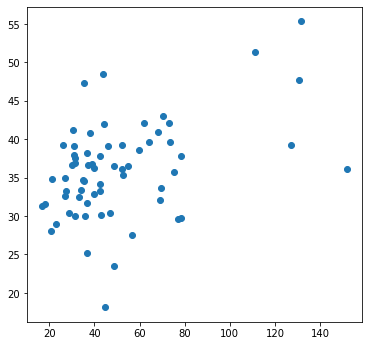

In [83]:
plt.scatter(PLA, PRV) 


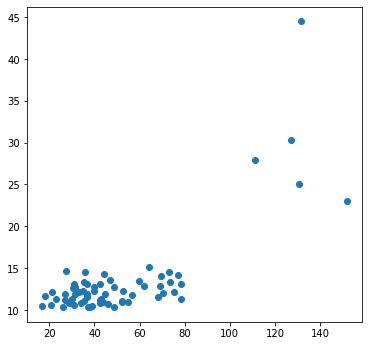

In [91]:
plt.scatter(PLA, PRA)


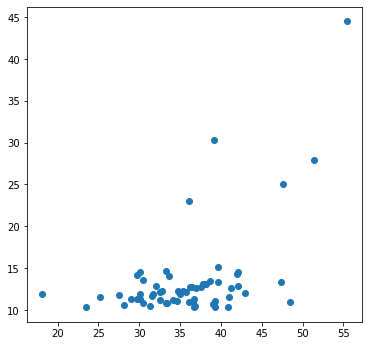

In [88]:
plt.scatter(PRV, PRA)


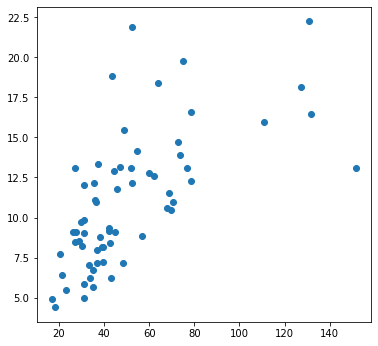

In [92]:
plt.scatter(PLA, ALA)

In [93]:
print("PLA > 100: ", np.nonzero(PLA > 100))
print("PRA > 20", np.nonzero(PRA > 20))
print("PRV > 45", np.nonzero(PRV > 45))

PLA > 100:  (array([ 7,  8, 10, 18, 19], dtype=int64),)
PRA > 20 (array([ 7,  8, 10, 18, 19], dtype=int64),)
PRV > 45 (array([ 7,  8, 10, 33, 59], dtype=int64),)


In [94]:
print(np.array(PRV_list))
print(np.array(PRA_list))
print(np.array(PLA_list))

[37.9399 33.2567 36.8044 40.8535 41.1799 36.566  34.1078 51.3606 55.3868
 34.582  47.6362 39.591  36.056  32.5795 28.0657 37.7867 32.8389 37.5016
 39.1957 36.1432 27.5052 33.2324 36.2466 36.6917 42.0369 41.9178 39.076
 39.2838 31.7027 29.7774 25.1638 36.9254 34.9953 47.3332 29.6655 32.494
 34.7144 33.4037 42.9951 23.4661 38.2224 33.5887 28.978  31.5898 34.8769
 39.1026 35.6991 32.0643 36.6666 30.0453 39.6096 31.3045 30.4268 30.1427
 40.9575 37.7427 36.4795 30.4263 42.1128 48.49   39.2719 18.1009 38.6053
 35.3803 30.0443]
[13.1446 10.8438 10.5262 10.3132 12.6122 10.9258 11.2316 27.9306 44.5424
 11.0848 25.1077 15.1006 11.025  11.2275 10.6406 13.1043 12.3313 12.8003
 30.2862 23.0736 11.8279 14.6189 12.7571 10.4241 12.8412 14.3234 10.7777
 10.3581 11.9698 11.339  11.5442 12.5821 11.91   13.3908 14.2204 12.1504
 12.2637 10.7979 12.0019 10.325  13.07   14.0127 11.3218 11.6517 12.1076
 10.5645 12.1282 12.8603 11.3515 11.9222 13.3992 10.4788 10.8267 11.3416
 11.6169 13.1545 12.7425 13.5724 14

In [95]:
col = np.where(PLA>100,'r','b')
plt.scatter(PLA, PRV, c=col)
plt.xlabel('PLA')
plt.ylabel('PRV')
plt.savefig('Instance PLA vs PRV.png')
plt.close()

In [96]:
col1 = np.where(PLA>100,'r','b')
plt.scatter(PLA, PRV, c=col1)
plt.xlabel('PLA')
plt.ylabel('PRV')
plt.savefig('Instance PLA vs PRV.png')
plt.close()

col2 = np.where(PRA>20,'r','b')
plt.scatter(PLA, PRA, c=col2)
plt.xlabel('PLA')
plt.ylabel('PRA')
plt.savefig('Instance PLA vs PRA.png')
plt.close()

plt.scatter(PRV, PRA)
plt.xlabel('PRV')
plt.ylabel('PRA')
plt.savefig('Instance PRV vs PRA.png')
plt.close()